# intro

The purpose of this file will be to try and create the M term for the Lind section and understand it.

We will take a gateway, a section, etc. Maybe a latitude or longitude. We can calculate the M across that section. I think this is dependent upon the velocity across the section

# load the packages and the grid to run

In [1]:
# import packages and functions
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import gsw
import sys

In [2]:
sys.path.append("/home/mmurakami/crios_backups/an_helper_functions")

from get_Jterms import *

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



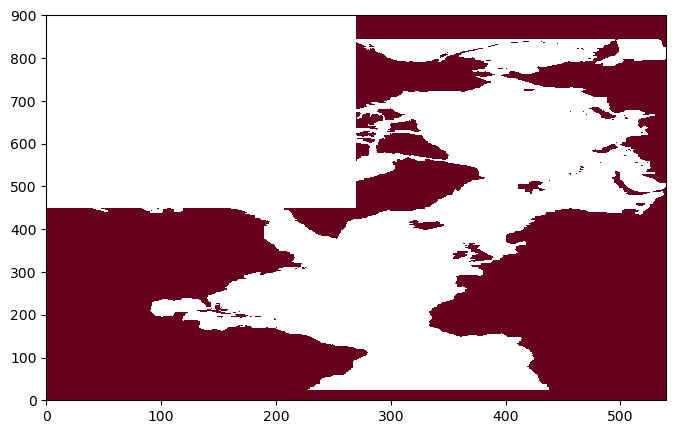

In [3]:
# calculate the sea ice edge for 1 and 2
thresh = .15  # 15% sea ice coverage as Barton

fig = plt.figure(figsize=(8,5))

# plot the basins, color by label
landmsk = np.zeros((ny,nx))
landmsk[np.isnan(hfC[0])] = 2
landmsk[hfC[0] == 1] = np.nan

# add the land
plt.pcolormesh(get_aste_tracer(landmsk,nfx,nfy)[0],cmap='RdBu')

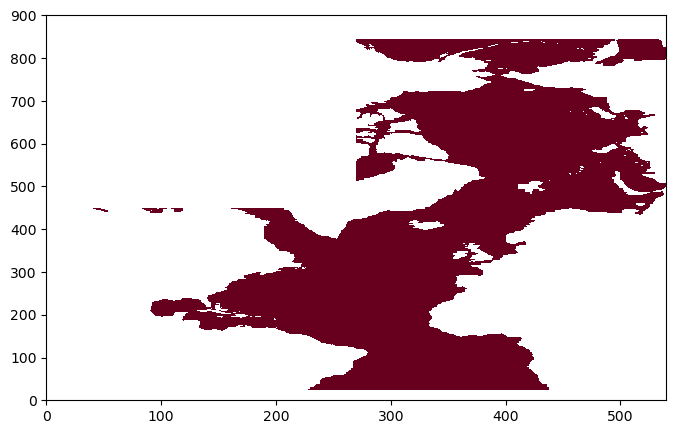

In [4]:
# calculate the sea ice edge for 1 and 2
thresh = .15  # 15% sea ice coverage as Barton

fig = plt.figure(figsize=(8,5))

# plot the basins, color by label
landmsk = np.zeros((ny,nx))
landmsk[np.isnan(hfC[0])] = 2
landmsk[hfC[0] == 1] = np.nan

# add the land
plt.pcolormesh(get_aste_tracer(hfC,nfx,nfy)[0],cmap='RdBu')

In [5]:
mymsk = np.zeros((ny,nx))
idxs = np.where(mskBasin == 6)

for i,j in zip (idxs[0],idxs[1]):
    mymsk[i,j] = 1

In [6]:
hfC = mygrid['hFacC']
hfC0 = hfC[0]

# Create a copy to modify
hfC_modified = hfC.copy()
hfC0_copy = np.full((ny, nx), np.nan)
hfC0_copy[np.isnan(hfC0)] = 1

# Modify only the copied version
hfC_modified[0] = hfC0_copy

# # Plot the modified version
# plt.pcolormesh(get_aste_tracer(hfC_modified, nfx, nfy)[0])
# plt.colorbar()
# plt.show()

# define the timesteps and gates

In [7]:
# ocean and ice
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019              # for ASTE R1

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)
allyears = np.arange(2003,2018,1)

In [8]:
x_bso = gg['BarentsSeaOpening']["ix"]-1   # 0 
y_bso = gg['BarentsSeaOpening']["jy"]-1
x_bso[x_bso == 162] = 161

x_sfj = gg['Svalbard-FranzJosefIslands']["ix"]-1   # 1
y_sfj = gg['Svalbard-FranzJosefIslands']["jy"]-1
x_sfj,y_sfj = x_sfj[1:],y_sfj[1:]

x_fjnz = gg['FranzJosefIslands-NovayaZemlya']["ix"]-1  #2 
y_fjnz = gg['FranzJosefIslands-NovayaZemlya']["jy"]-1

# x_sta_vilkit = gg['StAnnaTrough/Voronin/Vilkitshogo']["ix"]-1  #3
# y_sta_vilkit = gg['StAnnaTrough/Voronin/Vilkitshogo']["jy"]-1

test = np.full(mskBasin.shape,np.nan)
test[y_bso,x_bso] = 1
test[y_sfj,x_sfj] = 2
test[y_fjnz,x_fjnz] = 3
# test[y_sta_vilkit,x_sta_vilkit] = 4

(400.0, 600.0)

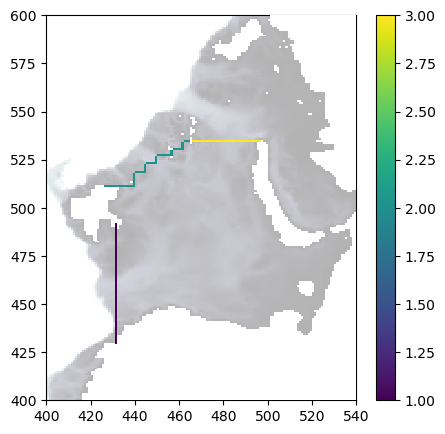

In [9]:
# get the four edges of this

# mask[mask>1]=1
xlims = np.array([400,540])
ylims = np.array([400,600])

# plot this
fig = plt.figure(figsize = (5,5))
plt.pcolormesh(get_aste_tracer(mygrid['Depth'],nfx,nfy)[0],cmap="bone",alpha=0.3,vmin=0,vmax=1000)
plt.pcolormesh(get_aste_tracer(hfC_modified,nfx,nfy)[0],cmap="bone_r",zorder=5)
cb = plt.pcolormesh(get_aste_tracer(test,nfx,nfy)[0],zorder=10)
plt.colorbar(cb)
plt.xlim(xlims)
plt.ylim(ylims)

# now get the J terms for the internal region

In [10]:
# define the timesteps we want, we need theta, salt, binned_theta, binned_salt and U and V to get volume

In [11]:
# get the timesteps for the year 2007
# ocean and ice
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2007"] = np.arange(3,5,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])
dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()

tsteps = len(datetimes)-1
tsteps

1

In [12]:
# load the bins
# we will use the bins from the An run so that we have the same thing in both sections
# Paths for the bins in this run
copypath = "/scratch/mmurakami/ASTE_270/LAYERS_copies/"
filename = "layers2TH"
boundsT = rdmds(copypath + filename)
binsTH_edges = boundsT.reshape(boundsT.shape[0])
binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
nT = binsTH_edges.shape[0]-1
# boundsT

filename = "layers1SLT"
boundsS = rdmds(copypath + filename)
binsSLT_edges = boundsS.reshape(boundsS.shape[0])
binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
nS = binsSLT_edges.shape[0]-1
# boundsS

binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]

binwidthT1 = (binwidthT[:-1] + binwidthT[1:])/2
binwidthS1 = (binwidthS[:-1] + binwidthS[1:])/2

dT,dS = np.meshgrid(binwidthT,binwidthS)
dT = dT.reshape(112,112,1)
dS = dS.reshape(112,112,1)

binmidT = ((boundsT[:-1] + boundsT[1:])/2).reshape(nT)
binmidS = ((boundsS[:-1] + boundsS[1:])/2).reshape(nT)

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]

Tbin,Sbin = np.meshgrid(binsTH_edges,binsSLT_edges)
Tbincent,Sbincent = np.meshgrid(binsTH_centers,binsSLT_centers)
nS,nT = 112,112

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]
Tbin2,Sbin2 = np.meshgrid(binmidTp,binmidSp)

In [13]:
# add the isopycnals
# add the density contours from gsw
smin = 25.5 - (0.01 * 25.5)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 38 + (0.01 * 38)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -2 + (0.1 * -2)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 31 + (0.1 * 31)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 50
ydim = 50
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2,31,ydim)
si = np.linspace(25.5,38,xdim)
Freez_temp = gsw.CT_freezing(si,0,0)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens2 = dens - 1000

tmin, tmax, smin, smax sizes=, -2.2 34.1 25.245 38.38


In [14]:
# create the volume and bin this
DXG3d = np.tile(mygrid['DXG'][np.newaxis,:,:],(nz,1,1))
DYG3d = np.tile(mygrid['DYG'][np.newaxis,:,:],(nz,1,1))
vol = DRF3d * DXG3d * DYG3d

In [15]:
# J_terms_nn have the Sv that we need at each value, can we not plot these as well?

# I think we want to plot G_T and G_S as well as the surface term, which will be volume added to any one set of T-S bins

# set a larger array for one year of the terms

vol_mesh_all = np.zeros((tsteps,nS,nT))
JtermsT_all = np.zeros((tsteps,5,nS,nT))  # recall this is in the format tend, adv, df, kpp, and surface
JtermsS_all = np.zeros((tsteps,5,nS,nT))
JtermsT_nn_all = np.zeros((tsteps,5,nS,nT))
JtermsS_nn_all = np.zeros((tsteps,5,nS,nT))

In [16]:
iB = 6
for i in range(len(datetimes)-1):
    print(datetimes[i])
    tsstrhere = tsstr[i:i+2]
    datetimeshere = datetimes[i:i+2]
    dt = datetimes[i+1]-datetimes[i]
    dt = dt.total_seconds()
    t2 = int(tsstr[i+1])

    # run the function - check if this works
    vol_mesh,JtermsT,JtermsS,JtermsT_nn,JtermsS_nn = get_Jterms(fnames,tsstrhere,datetimeshere,dt,t2,mymsk,iB,RAC,RAC3,myparms)

    vol_mesh_all[i] = vol_mesh
    JtermsT_all[i] = JtermsT
    JtermsS_all[i] = JtermsS
    JtermsT_nn_all[i] = JtermsT_nn
    JtermsS_nn_all[i] = JtermsS_nn

2007-03-01 00:00:00
doing salt budget
doing heat budget
2
doing volume
doing TS binning
creating the J terms now
doing JtermsT
total residual -8.16223157514287e-12 Sv/PSU
doing JtermsS
total residual -0.057690198381235396 Sv/degC
doing not normalized J terms
total residual -8.16223157514287e-12 Sv
total residual -0.057690198381235396 Sv


In [15]:
cmap = plt.get_cmap('RdBu_r',31).copy()
cmap.set_under(color='white')
cmap2 = plt.get_cmap('viridis',31).copy()
cmap2.set_under(color='white')

# get the dVdt term

# Let's try to recreate eq. 20 of the Hieronymus 2014 paper

$$
\frac{\partial v}{\partial t} = -\nabla \textbf{J} - \frac{\partial ^2 M}{\partial T \partial S} - \frac{\partial ^2 E}{\partial T \partial S} 
$$

In [122]:
tsstr

array(['0000788976', '0000793440', '0000797472', '0000801936',
       '0000806256', '0000810720', '0000815040', '0000819504',
       '0000823968', '0000828288', '0000832752', '0000837072'],
      dtype='<U32')

In [114]:
# get ETAN as snapshots, get THETADR and SALTDR as snapshots

file_name = 'budg3d_snap_set2'
meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_snap_set2["fldList"])
varnames = np.array(["THETADR","SALTDR"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

THETA = np.full((len(tsstr),nz,ny,nx),np.nan)
SALT = np.full((len(tsstr),nz,ny,nx),np.nan)

for i in range(len(tsstr)):
    thisTHETADR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisTHETADR = thisTHETADR.reshape(nz,ny,nx)
    THETA[i] = thisTHETADR / DRF3d  * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))  # degC
    thisSALTDR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[1])
    thisSALTDR = thisSALTDR.reshape(nz,ny,nx)
    SALT[i] = thisSALTDR / DRF3d  * np.tile(mymsk[np.newaxis,:,:],(nz,1,1)) # PSU

In [115]:
# create the TS bins for the two timesteps

binned_theta_new = np.zeros((len(tsstr),nz,ny,nx))
binned_salt_new = np.zeros((len(tsstr),nz,ny,nx))

for i in range(len(tsstr)):
    binned_thetai = bin_array(THETA[i],binsTH_edges)
    binned_thetai = binned_thetai.astype(float)
    binned_thetai[binned_thetai == nT] = np.nan      # I think this line is why we have previously had the mismatch between layers and avg
    binned_salinityi = bin_array(SALT[i],binsSLT_edges)
    binned_salinityi = binned_salinityi.astype(float)
    binned_salinityi[binned_salinityi == nS] = np.nan

    # set these in the larger array
    binned_theta_new[i] = binned_thetai
    binned_salt_new[i] = binned_salinityi

In [116]:
# define dETAN/dt -  I don't think we want to do this yet I think we want to bin first and then calculate
file_name = 'budg2d_snap_set1'
meta_budg2d_snap_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")

# try to read this with rec
fldlist = np.array(meta_budg2d_snap_set1['fldList'])
varnames = np.array(['ETAN'])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

ETAN = np.full((len(tsstr),ny,nx),np.nan)

for i in range(len(tsstr)):
    thisETAN,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisETAN = thisETAN.reshape(ny,nx)
    ETAN[i] = thisETAN

# dETANdt =  (ETAN[1, :, :] - ETAN[0, :, :]) / dt    # m/s

# define dV/dt
dz = mk3D_mod(mygrid['DRF'],hfC) * hfC           # m (dZ)
dxdy = RAC3
volume = np.zeros((len(tsstr),nz,ny,nx))
for i in range(len(tsstr)):
    volume[i] = (dz + ETAN[i]) * dxdy * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))           # m^3

In [118]:
# create the volume meshes for the two timesteps and plot
idxs = np.where(mymsk == 1)
npoints = len(idxs[0])
mesh = create_TS_mesh(tsstr,nS,nT,npoints,binned_salt_new, binned_theta_new,volume,idxs,dT,dS)
dVdt = (np.nansum(mesh[1],axis=2) - np.nansum(mesh[0],axis=2)) / dt   # m^3/degC/PSU / s = m^3/s/degC/PSU

/tmp/ipykernel_338147/2288113006.py:3: RuntimeWarning: divide by zero encountered in log
  cb = ax.pcolormesh(Sbin,Tbin,np.log(dVdt*1e-6),cmap="seismic",vmin=-12,vmax=12)
/tmp/ipykernel_338147/2288113006.py:3: RuntimeWarning: invalid value encountered in log
  cb = ax.pcolormesh(Sbin,Tbin,np.log(dVdt*1e-6),cmap="seismic",vmin=-12,vmax=12)


(-2.0, 6.0)

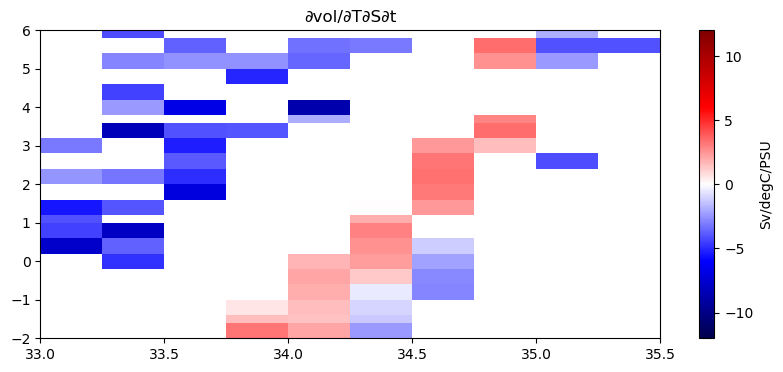

In [121]:
fig = plt.figure()
ax = plt.subplot(111)
cb = ax.pcolormesh(Sbin,Tbin,np.log(dVdt*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("∂vol/∂T∂S∂t")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,6)

# look at the get_J code and try to get the tendencies at the gate from advx and advy

In [ ]:
allyears = np.array([2007])

In [15]:
# Define dimensions
num_years = len(allyears)  # Number of years
gate_labels = ["BSO", "SFJ", "FJNZ"]

# Get indices for each gate dynamically
gate_indices = {gate: np.where(test == label) for gate, label in zip(gate_labels, [1, 2, 3])}

# Initialize dictionaries with variable-length arrays for each gate
theta_timeseries = {gate: np.full((num_years, 12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()}
salt_timeseries = {gate: np.full((num_years, 12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()}
binned_theta_timeseries = {gate: np.full((num_years, 12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()}
binned_salt_timeseries = {gate: np.full((num_years, 12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()}

iy = 0  # Counter for year index

for year in allyears:
    print(f"Processing year: {year}")

    # Get time steps for this year
    years = np.array([str(year)])
    times = {year: np.arange(1, 13, 1)}  # All 12 months
    tsstr, datetimes = get_tsteps(times, fnames, dt_aste, startyr, 1, 1)

    # Initialize arrays to hold full-year data
    THETA_all = np.full((len(tsstr), nz, ny, nx), np.nan)
    SALT_all = np.full((len(tsstr), nz, ny, nx), np.nan)
    binned_THETA_all = np.full((len(tsstr),nz,ny,nx),np.nan)
    binned_SALT_all = np.full((len(tsstr),nz,ny,nx),np.nan)

    # Loop over all time steps
    for i, ts in enumerate(tsstr):
        file_name = "state_3d_set1"
        meta_state_3d_set1 = parsemeta(dirState + file_name + "." + ts + ".meta")
        fldlist = np.array(meta_state_3d_set1["fldList"])
        recs = [np.where(fldlist == var)[0][0] for var in ["THETA", "SALT"]]

        read = [int(ts)]
        THETAi, _, _ = rdmds(os.path.join(dirState, file_name), read, returnmeta=True, rec=recs[0])
        SALTi, _, _ = rdmds(os.path.join(dirState, file_name), read, returnmeta=True, rec=recs[1])

        THETA_all[i] = np.reshape(THETAi, (nz, ny, nx))
        SALT_all[i] = np.reshape(SALTi, (nz, ny, nx))

        # bin these and also set in the gate
        binned_theta = bin_array(np.reshape(THETAi, (nz, ny, nx)),binsTH_edges)
        binned_theta = binned_theta.astype(float)
        binned_theta[binned_theta == nT] = np.nan      # I think this line is why we have previously had the mismatch between layers and avg
        binned_salinity = bin_array(np.reshape(SALTi, (nz, ny, nx)),binsSLT_edges)
        binned_salinity = binned_salinity.astype(float)
        binned_salinity[binned_salinity == nS] = np.nan
        binned_THETA_all[i] = binned_theta
        binned_SALT_all[i] = binned_salinity
  

    # Compute annual averages for each gate
    for gate in gate_labels:
        y_idx, x_idx = gate_indices[gate]  # Get dynamic indices
        theta_timeseries[gate][iy, :, :, :] = THETA_all[:, :, y_idx, x_idx]
        salt_timeseries[gate][iy, :, :, :] = SALT_all[:, :, y_idx, x_idx]
        binned_theta_timeseries[gate][iy, :, :, :] = binned_THETA_all[:, :, y_idx, x_idx]
        binned_salt_timeseries[gate][iy, :, :, :] = binned_SALT_all[:, :, y_idx, x_idx]

    iy += 1  # Move to the next year

Processing year: 2003



KeyboardInterrupt



In [17]:
def line_orientation(x, y):
    orientations = np.array([])

    # Iterate through the list of points
    for i in range(1, len(x)):
        if x[i] == x[i - 1] and y[i] != y[i - 1]:
            orientations = np.append(orientations,"V") # vertical line add zonal transp
        elif y[i] == y[i - 1] and x[i] != x[i - 1]:
            orientations = np.append(orientations,"H") # horizontal line add meridional transp
        else:
            orientations = np.append(orientations,"V")  # fill na should be for top of vertical line (ie U)

    # the last one will be the same as the second to last orientation so we can keep consistent sizing
    orientations = np.append(orientations,orientations[-1])

    return orientations
choose_UV_bso = line_orientation(y_bso,x_bso)
choose_UV_sfj = line_orientation(y_sfj,x_sfj)
choose_UV_fjnz = line_orientation(y_fjnz,x_fjnz)

In [18]:
choose_UV_bso3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_bso,x_bso):
    choose_UV_bso3d[:,i,j] = np.full(nz,choose_UV_bso[idx])
    idx += 1

choose_UV_sfj3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_sfj,x_sfj):
    choose_UV_sfj3d[:,i,j] = np.full(nz,choose_UV_sfj[idx])
    idx += 1

choose_UV_fjnz3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_fjnz,x_fjnz):
    choose_UV_fjnz3d[:,i,j] = np.full(nz,choose_UV_fjnz[idx])
    idx += 1

In [70]:
# Define dimensions
gate_labels = ["BSO", "SFJ", "FJNZ"]

# Get indices for each gate dynamically
gate_indices = {gate: np.where(test == label) for gate, label in zip(gate_labels, [1, 2, 3])}

# Selection dictionary for horizontal (ADVx_TH) or vertical (ADVy_TH) transport
choose_UV = {"BSO": choose_UV_bso3d, "SFJ": choose_UV_sfj3d, "FJNZ": choose_UV_fjnz3d}

# Initialize dictionary to store heat transport for each gate (without averaging)
heat_transport_timeseries = {
    gate: np.full((num_years,12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()
}  # Shape: (12 months, depth, number of grid points per gate)

# Select a single year for processing
year = allyears[4]  # Replace with the desired year
iy = 0
for year in allyears:
    print(f"Processing year: {year}")
    
    # Get time steps for this year
    times = {year: np.arange(1, 13, 1)}  # All 12 months
    tsstr, datetimes = get_tsteps(times, fnames, dt_aste, startyr, 1, 1)
    
    # Initialize arrays to hold full-year data (12 months)
    ADVx_TH_all = np.full((12, nz, ny, nx), np.nan)
    ADVy_TH_all = np.full((12, nz, ny, nx), np.nan)
    
    # Loop over all months (time steps)
    for i, ts in enumerate(tsstr):
        file_name = "budg3d_hflux_set2"
        meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + ts + ".meta")
        fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
        recs = [np.where(fldlist == var)[0][0] for var in ["ADVx_TH", "ADVy_TH"]]
    
        read = [int(ts)]
        ADVx_THi, _, _ = rdmds(os.path.join(dirIn, file_name), read, returnmeta=True, rec=recs[0])
        ADVy_THi, _, _ = rdmds(os.path.join(dirIn, file_name), read, returnmeta=True, rec=recs[1])
    
        ADVx_TH_all[i] = np.reshape(ADVx_THi, (nz, ny, nx))
        ADVy_TH_all[i] = np.reshape(ADVy_THi, (nz, ny, nx))
    
    # Store heat transport for each month without averaging
    for gate in gate_labels:
        y_idx, x_idx = gate_indices[gate]  # Get dynamic indices
        UV_selection = choose_UV[gate]  # Determine whether to use ADVx_TH or ADVy_TH
        
        for month in range(12):
            for depth in range(nz):
                advx_selected = ADVx_TH_all[month, depth, y_idx, x_idx]  # No averaging
                advy_selected = ADVy_TH_all[month, depth, y_idx, x_idx]  # No averaging
                
                # Use np.where() for per-gridpoint selection
                if gate == "BSO":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", advx_selected, -advy_selected)
                elif gate == "SFJ":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
                else:
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
    
                heat_transport_timeseries[gate][iy,month, depth, :] = adv_selected  # Store per month
    
    print(f"Processed heat transport for {year}, with full monthly resolution.")
    iy += 1

Processing year: 2003
Processed heat transport for 2003, with full monthly resolution.
Processing year: 2004
Processed heat transport for 2004, with full monthly resolution.
Processing year: 2005
Processed heat transport for 2005, with full monthly resolution.
Processing year: 2006
Processed heat transport for 2006, with full monthly resolution.
Processing year: 2007
Processed heat transport for 2007, with full monthly resolution.
Processing year: 2008
Processed heat transport for 2008, with full monthly resolution.
Processing year: 2009
Processed heat transport for 2009, with full monthly resolution.
Processing year: 2010
Processed heat transport for 2010, with full monthly resolution.
Processing year: 2011
Processed heat transport for 2011, with full monthly resolution.
Processing year: 2012
Processed heat transport for 2012, with full monthly resolution.
Processing year: 2013
Processed heat transport for 2013, with full monthly resolution.
Processing year: 2014
Processed heat transp

In [19]:
# Define dimensions
gate_labels = ["BSO", "SFJ", "FJNZ"]

# Get indices for each gate dynamically
gate_indices = {gate: np.where(test == label) for gate, label in zip(gate_labels, [1, 2, 3])}

# Selection dictionary for horizontal (ADVx_TH) or vertical (ADVy_TH) transport
choose_UV = {"BSO": choose_UV_bso3d, "SFJ": choose_UV_sfj3d, "FJNZ": choose_UV_fjnz3d}

# Initialize dictionary to store heat transport for each gate (without averaging)
num_years = len(allyears)  # Number of years
salt_transport_timeseries = {
    gate: np.full((num_years,12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()
}  # Shape: (12 months, depth, number of grid points per gate)

# Select a single year for processing
year = allyears[4]  # Replace with the desired year
iy = 0
for year in allyears:
    print(f"Processing year: {year}")
    
    # Get time steps for this year
    times = {year: np.arange(1, 13, 1)}  # All 12 months
    tsstr, datetimes = get_tsteps(times, fnames, dt_aste, startyr, 1, 1)
    
    # Initialize arrays to hold full-year data (12 months)
    ADVx_SLT_all = np.full((12, nz, ny, nx), np.nan)
    ADVy_SLT_all = np.full((12, nz, ny, nx), np.nan)
    
    # Loop over all months (time steps)
    for i, ts in enumerate(tsstr):
        file_name = "budg3d_hflux_set2"
        meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + ts + ".meta")
        fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
        recs = [np.where(fldlist == var)[0][0] for var in ["ADVx_SLT", "ADVy_SLT"]]
    
        read = [int(ts)]
        ADVx_SLTi, _, _ = rdmds(os.path.join(dirIn, file_name), read, returnmeta=True, rec=recs[0])
        ADVy_SLTi, _, _ = rdmds(os.path.join(dirIn, file_name), read, returnmeta=True, rec=recs[1])
    
        ADVx_SLT_all[i] = np.reshape(ADVx_SLTi, (nz, ny, nx))
        ADVy_SLT_all[i] = np.reshape(ADVy_SLTi, (nz, ny, nx))
    
    # Store heat transport for each month without averaging
    for gate in gate_labels:
        y_idx, x_idx = gate_indices[gate]  # Get dynamic indices
        UV_selection = choose_UV[gate]  # Determine whether to use ADVx_SLT or ADVy_SLT
        
        for month in range(12):
            for depth in range(nz):
                advx_selected = ADVx_SLT_all[month, depth, y_idx, x_idx]  # No averaging
                advy_selected = ADVy_SLT_all[month, depth, y_idx, x_idx]  # No averaging
                
                # Use np.where() for per-gridpoint selection
                if gate == "BSO":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", advx_selected, -advy_selected)
                elif gate == "SFJ":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
                else:
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
    
                salt_transport_timeseries[gate][iy,month, depth, :] = adv_selected  # Store per month
    
    print(f"Processed salt transport for {year}, with full monthly resolution.")
    iy += 1

Processing year: 2003
Processed salt transport for 2003, with full monthly resolution.
Processing year: 2004
Processed salt transport for 2004, with full monthly resolution.
Processing year: 2005
Processed salt transport for 2005, with full monthly resolution.
Processing year: 2006
Processed salt transport for 2006, with full monthly resolution.
Processing year: 2007
Processed salt transport for 2007, with full monthly resolution.
Processing year: 2008
Processed salt transport for 2008, with full monthly resolution.
Processing year: 2009
Processed salt transport for 2009, with full monthly resolution.
Processing year: 2010
Processed salt transport for 2010, with full monthly resolution.
Processing year: 2011
Processed salt transport for 2011, with full monthly resolution.
Processing year: 2012
Processed salt transport for 2012, with full monthly resolution.
Processing year: 2013
Processed salt transport for 2013, with full monthly resolution.
Processing year: 2014
Processed salt transp

In [20]:
data_to_save = {
    "salt_transport_timeseries": salt_transport_timeseries
}

# Save to a .npy file
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/timeseries_data_advslt.npy", data_to_save)

In [20]:
# do also for U and V mass (will be used to look at in or outflow
dirtrsp = dirrun + "diags/TRSP/"

# Define dimensions
gate_labels = ["BSO", "SFJ", "FJNZ"]

# Get indices for each gate dynamically
gate_indices = {gate: np.where(test == label) for gate, label in zip(gate_labels, [1, 2, 3])}

# Selection dictionary for horizontal (ADVx_TH) or vertical (ADVy_TH) transport
choose_UV = {"BSO": choose_UV_bso3d, "SFJ": choose_UV_sfj3d, "FJNZ": choose_UV_fjnz3d}

# Initialize dictionary to store heat transport for each gate (without averaging)
num_years = len(allyears)  # Number of years
velmass_timeseries = {
    gate: np.full((num_years,12, nz, len(indices[0])), np.nan) for gate, indices in gate_indices.items()
}  # Shape: (12 months, depth, number of grid points per gate)

# Select a single year for processing
year = allyears[4]  # Replace with the desired year
iy = 0
for year in allyears:
    print(f"Processing year: {year}")
    
    # Get time steps for this year
    times = {year: np.arange(1, 13, 1)}  # All 12 months
    tsstr, datetimes = get_tsteps(times, fnames, dt_aste, startyr, 1, 1)
    
    # Initialize arrays to hold full-year data (12 months)
    UVELMASS_all = np.full((12, nz, ny, nx), np.nan)
    VVELMASS_all = np.full((12, nz, ny, nx), np.nan)
    
    # Loop over all months (time steps)
    for i, ts in enumerate(tsstr):
        file_name = "trsp_3d_set1"
        meta_trsp_3d_set1 = parsemeta(dirtrsp + file_name + "." + ts + ".meta")
        fldlist = np.array(meta_trsp_3d_set1["fldList"])
        recs = [np.where(fldlist == var)[0][0] for var in ["UVELMASS", "VVELMASS"]]
    
        read = [int(ts)]
        UVELMASSi, _, _ = rdmds(os.path.join(dirtrsp, file_name), read, returnmeta=True, rec=recs[0])
        VVELMASSi, _, _ = rdmds(os.path.join(dirtrsp, file_name), read, returnmeta=True, rec=recs[1])
    
        UVELMASS_all[i] = np.reshape(UVELMASSi, (nz, ny, nx))
        VVELMASS_all[i] = np.reshape(VVELMASSi, (nz, ny, nx))
    
    # Store heat transport for each month without averaging
    for gate in gate_labels:
        y_idx, x_idx = gate_indices[gate]  # Get dynamic indices
        UV_selection = choose_UV[gate]  # Determine whether to use ADVx_SLT or ADVy_SLT
        
        for month in range(12):
            for depth in range(nz):
                advx_selected = UVELMASS_all[month, depth, y_idx, x_idx]  # No averaging
                advy_selected = VVELMASS_all[month, depth, y_idx, x_idx]  # No averaging
                
                # Use np.where() for per-gridpoint selection
                if gate == "BSO":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", advx_selected, -advy_selected)
                elif gate == "SFJ":
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
                else:
                    adv_selected = np.where(UV_selection[depth, y_idx, x_idx] == "H", -advx_selected, -advy_selected)
    
                velmass_timeseries[gate][iy,month, depth, :] = adv_selected  # Store per month
    
    print(f"Processed velocity for {year}, with full monthly resolution.")
    iy += 1

Processing year: 2003
Processed velocity for 2003, with full monthly resolution.
Processing year: 2004
Processed velocity for 2004, with full monthly resolution.
Processing year: 2005
Processed velocity for 2005, with full monthly resolution.
Processing year: 2006
Processed velocity for 2006, with full monthly resolution.
Processing year: 2007
Processed velocity for 2007, with full monthly resolution.
Processing year: 2008
Processed velocity for 2008, with full monthly resolution.
Processing year: 2009
Processed velocity for 2009, with full monthly resolution.
Processing year: 2010
Processed velocity for 2010, with full monthly resolution.
Processing year: 2011
Processed velocity for 2011, with full monthly resolution.
Processing year: 2012
Processed velocity for 2012, with full monthly resolution.
Processing year: 2013
Processed velocity for 2013, with full monthly resolution.
Processing year: 2014
Processed velocity for 2014, with full monthly resolution.
Processing year: 2015
Proces

In [21]:
data_to_save = {
    "velmass_timeseries": velmass_timeseries
}

# Save to a .npy file
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/timeseries_data_velmass.npy", data_to_save)

# save these transports to file so we can look

In [72]:
# save these to file
# Combine all dictionaries into one
data_to_save = {
    "heat_transport_timeseries": heat_transport_timeseries,
    "theta_timeseries": theta_timeseries,
    "salt_timeseries": salt_timeseries,
    "binned_theta_timeseries": binned_theta_timeseries,
    "binned_salt_timeseries": binned_salt_timeseries
}

# Save to a .npy file
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/timeseries_data.npy", data_to_save)

# To load later
loaded_data = np.load("/scratch2/mmurakami/aste_270x450x180/ASTER1/timeseries_data.npy", allow_pickle=True).item()

# Access the saved dictionaries
heat_transport_timeseries = loaded_data["heat_transport_timeseries"]
theta_timeseries = loaded_data["theta_timeseries"]
salt_timeseries = loaded_data["salt_timeseries"]
binned_theta_timeseries = loaded_data["binned_theta_timeseries"]
binned_salt_timeseries = loaded_data["binned_salt_timeseries"]

# plot this in T-S space

In [96]:
march_bso_sample = np.zeros((heat_transport_timeseries['BSO'].shape[0],nz,ny,nx))
for ts in range(len(tsstr)):
    march_bso = heat_transport_timeseries['BSO'][0,ts]  # Shape: (depth, gate_length)
    print(march_bso.shape)
    print(march_bso[:,0].shape)

    iy = 0
    for i,j in zip(y_bso,x_bso):
        march_bso_sample[ts,:,i,j] = march_bso[:,iy]
        iy += 1

# march_bso_sample[march_bso_sample == 0] = np.nan
# march_bso_sample = march_bso_sample.reshape((1,nz,ny,nx))

(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)
(50, 63)
(50,)


In [97]:
# Assuming necessary variables and arrays like nS, nT, binned_theta, binned_salinity, Utransport, Vtransport, mask, nz, dT are defined
nmonths = 12

# Create an array for all distributions
distr = np.zeros((nmonths, nS, nT))

y_adj, x_adj = y_bso,x_bso

# Obtain theta and salinity bins
gate_thetabins = binned_theta[:, y_adj, x_adj]
gate_saltbins = binned_salinity[:, y_adj, x_adj]

# Aggregate the transport contributions
for m in range(nmonths):
    a = march_bso_sample[m]
    
    for z in range(nz):
        iT = gate_thetabins[z].astype(int)
        iS = gate_saltbins[z].astype(int)
        
        np.add.at(distr[m], (iS, iT), a[z, y_adj, x_adj] / binwidthS[iS] / binwidthT[iT])  # m^3/s/degC/PSU

IndexError: index 429 is out of bounds for axis 1 with size 12

In [66]:
distr[distr == 0] = np.nan

In [67]:

import calendar  # To get month names

# Assuming distr is of shape (12, nT, nS)
for i in range(12):
    fig = plt.figure(figsize=(5, 5))
    ax = plt.subplot(111)
    
    # Plot the data for the current month
    cb = ax.pcolormesh(Sbin, Tbin, np.log(distr[i] * 1e-6), cmap='seismic', vmin=-5, vmax=5)
    ax.set_ylim(-2.5, 8)
    ax.set_xlim(31, 35.5)
    plt.colorbar(cb, ax=ax, label="Sv/degC/PSU + into box")
    
    # Add density contours
    cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
    ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
    
    # Set the title to the month in 2007
    month_name = calendar.month_name[i + 1]  # Get full month name
    ax.set_title(f"{month_name} 2007")
    
    # Save the figure
    plt.savefig(f"figs/BSO_timeseries/distr_2007_{i}.png", dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to avoid excessive memory usage


/tmp/ipykernel_338147/306335185.py:9: RuntimeWarning: invalid value encountered in log
  cb = ax.pcolormesh(Sbin, Tbin, np.log(distr[i] * 1e-6), cmap='seismic', vmin=-5, vmax=5)


# great, now let's do this for annual averages and for the whole timeseries. we need:
- theta_timeseries salt_timeseries as binned values
- heat_transport_timeseries
- some sample of distr

In [86]:
heat_transport_timeseries['BSO'][0][:,0].shape

(12, 63)

In [109]:
# Assuming necessary variables and arrays like nS, nT, binned_theta, binned_salinity, Utransport, Vtransport, mask, nz, dT, etc., are defined

nyears = 15
nmonths = 12

# Create arrays for each gate's distribution over all years and months
distr_bso = np.zeros((nyears, nmonths, nS, nT))
distr_sfj = np.zeros((nyears, nmonths, nS, nT))
distr_fjnz = np.zeros((nyears, nmonths, nS, nT))

# Dictionary to store data per gate

gates = {
    "BSO": (distr_bso,y_bso,x_bso),
    "SFJ": (distr_sfj,y_sfj,x_sfj),
    "FJNZ": (distr_fjnz,y_fjnz,x_fjnz),

}

# Loop over each gate to process transport contributions
for gate_name, (distr_gate, y_adj, x_adj) in gates.items():
    # Sample array to store transport data for this gate
    gate_sample = np.zeros((nyears, nmonths, nz, ny, nx))
    binned_theta = np.zeros((nyears, nmonths, nz, ny, nx))
    binned_salinity = np.zeros((nyears, nmonths, nz, ny, nx))
    print(gate_name)
    
    # Iterate over years and months to define the gates in the shape nz,ny,nx
    for year in range(nyears):
        for m in range(nmonths):
            gate_data = heat_transport_timeseries[gate_name][year,m]  # Shape: (depth, gate_length)
            gate_tbin_data = binned_theta_timeseries[gate_name][year,m]  # Shape: (depth, gate_length)
            gate_sbin_data = binned_salt_timeseries[gate_name][year,m]  # Shape: (depth, gate_length)

            iy = 0
            for i, j in zip(y_adj, x_adj):
                gate_sample[year, m, :, i, j] = gate_data[:, iy]
                binned_theta[year, m, :, i, j] = gate_tbin_data[:, iy]
                binned_salinity[year, m, :, i, j] = gate_sbin_data[:, iy]
                iy += 1
    

    # Aggregate the transport contributions
    for year in range(nyears):
        print(allyears[year])
        for m in range(nmonths):
            a = gate_sample[year, m,:]
            gate_thetabins = binned_theta[year,m,:]
            gate_saltbins = binned_salinity[year,m,:]
            #print(a.shape,gate_thetabins.shape,gate_saltbins.shape)

            for z in range(nz):
                iT = gate_thetabins[z].astype(int)
                iS = gate_saltbins[z].astype(int)

                np.add.at(distr_gate[year, m], (iS, iT), a[z,:] / binwidthS[iS] / binwidthT[iT])  # m^3/s/degC/PSU


BSO
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
SFJ
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
FJNZ
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [110]:
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_bso.npy", distr_bso)
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_sfj.npy", distr_sfj)
np.save("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_fjnz.npy", distr_fjnz)

print("Distributions saved successfully.")

Distributions saved successfully.


/tmp/ipykernel_338147/3573568102.py:22: RuntimeWarning: divide by zero encountered in log10
  pcm = ax.pcolormesh(Sbin, Tbin, np.log10(data[i] * 1e-6), cmap='seismic', vmin=-5, vmax=5)
/tmp/ipykernel_338147/3573568102.py:22: RuntimeWarning: invalid value encountered in log10
  pcm = ax.pcolormesh(Sbin, Tbin, np.log10(data[i] * 1e-6), cmap='seismic', vmin=-5, vmax=5)


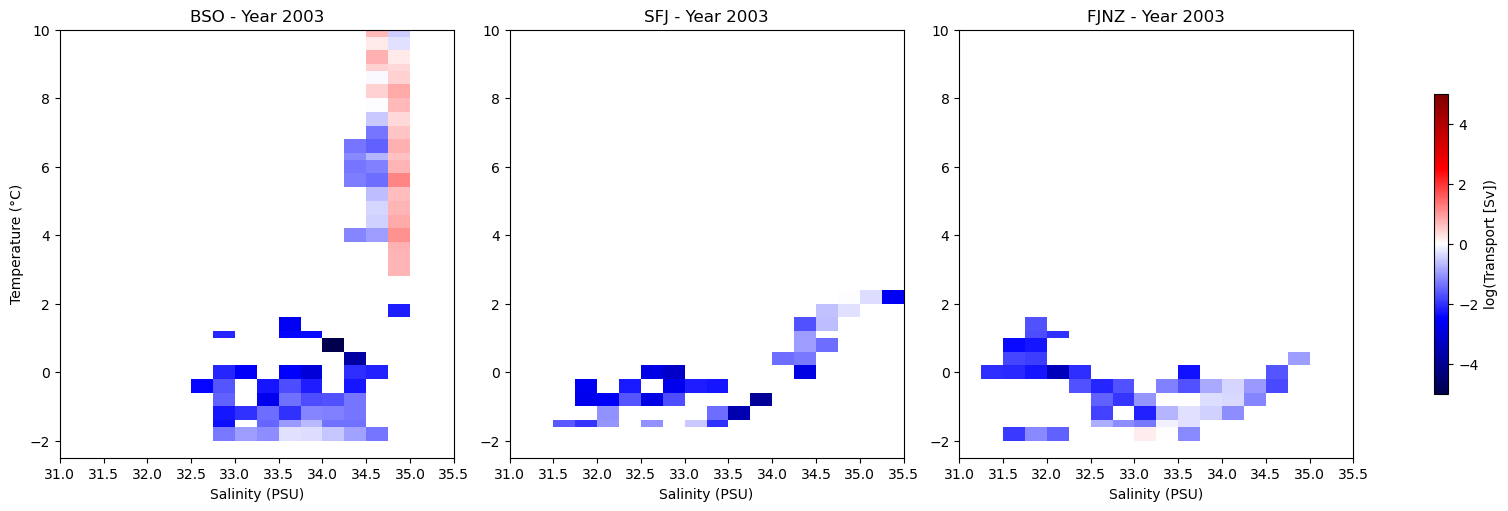

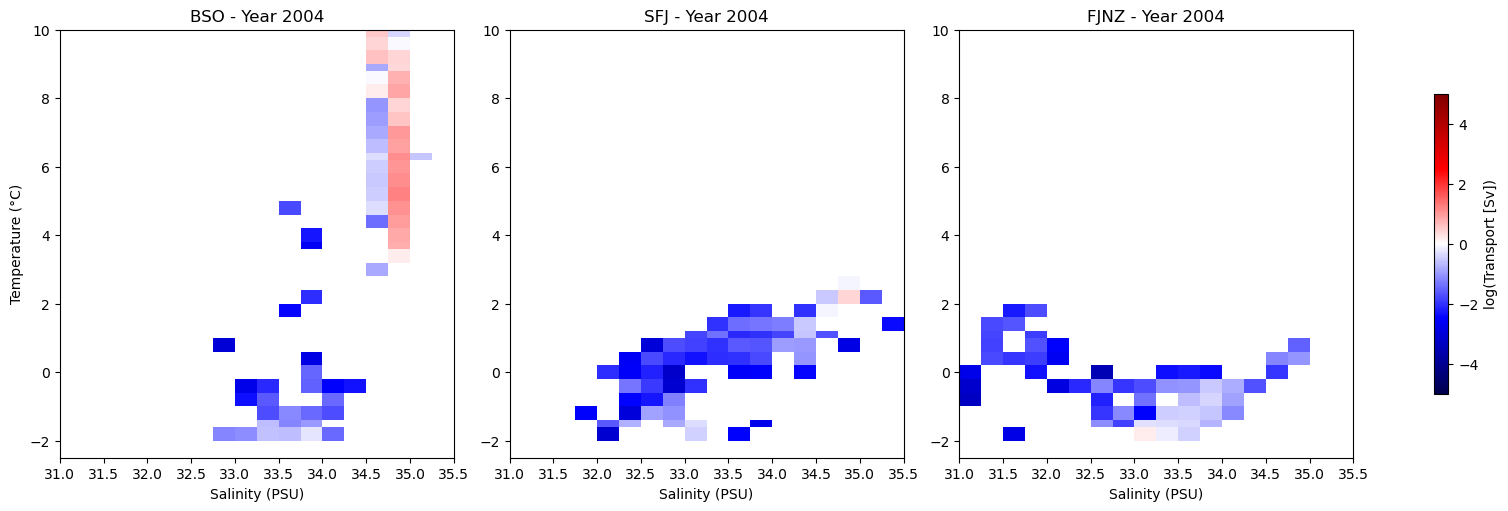

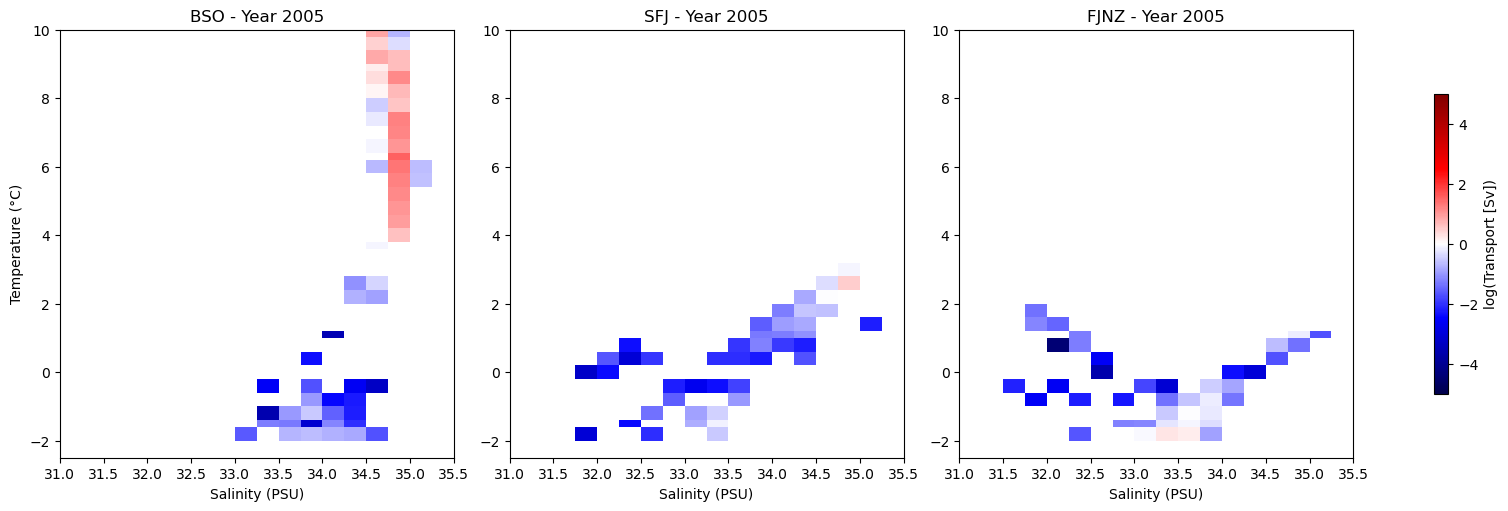

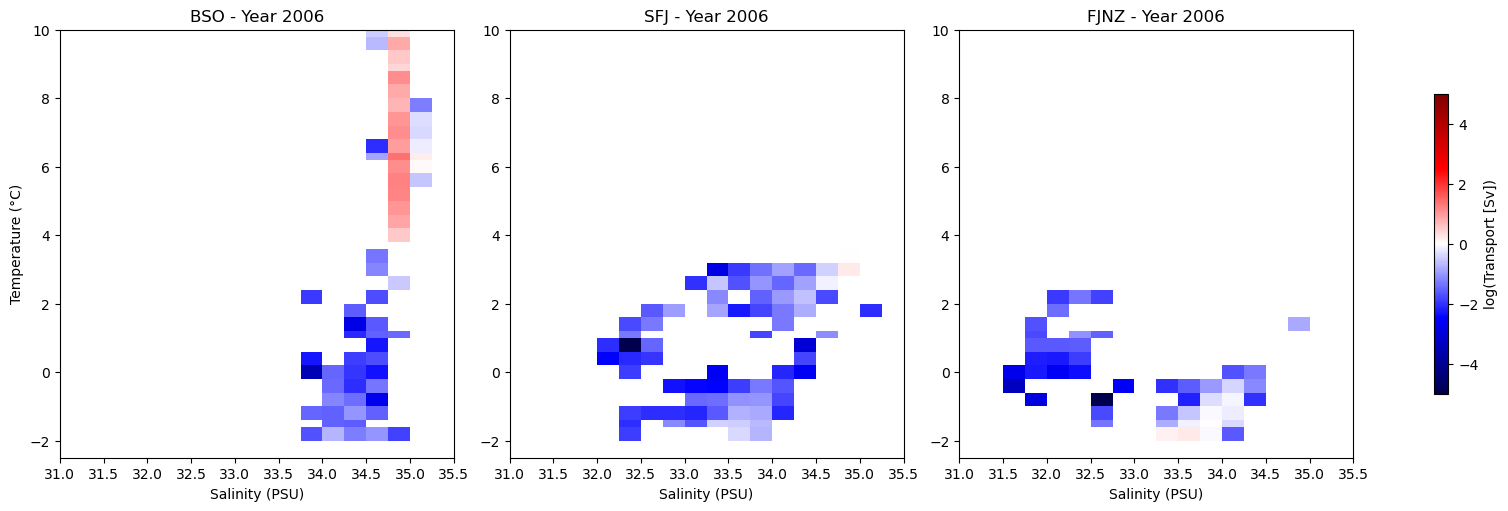

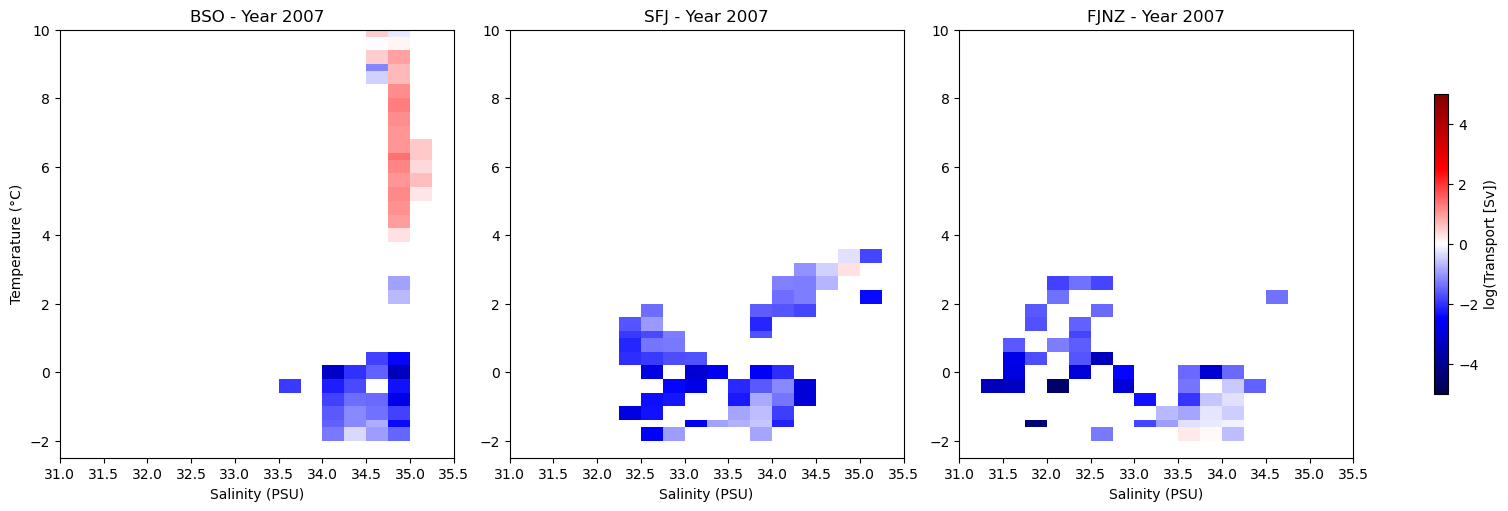

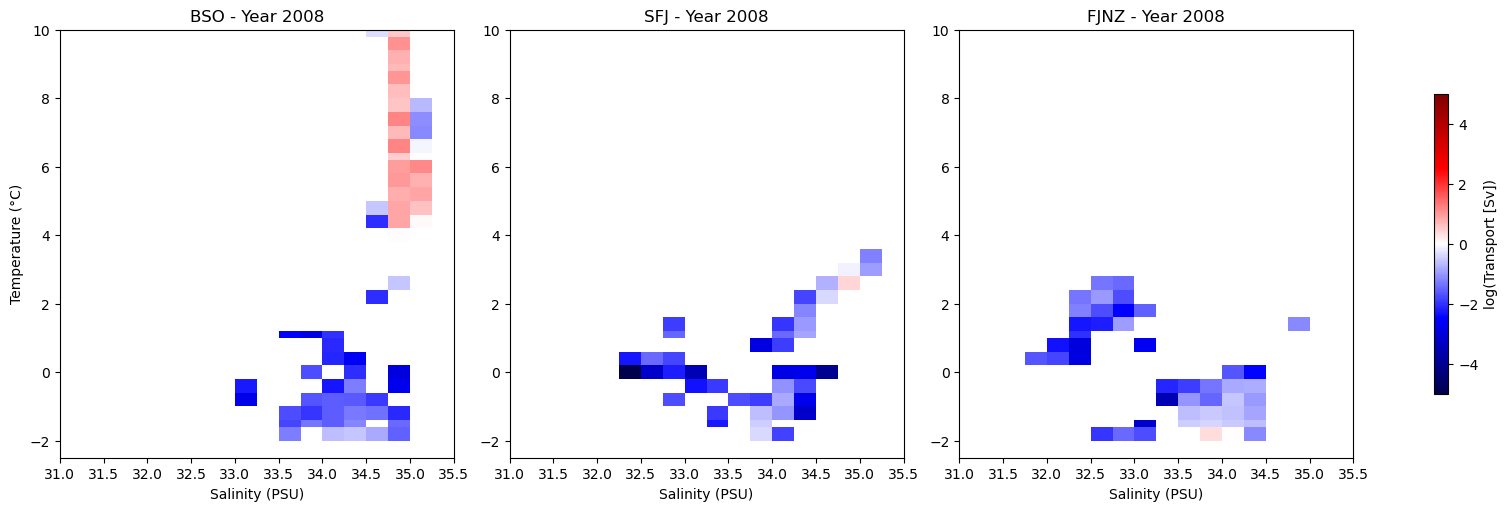

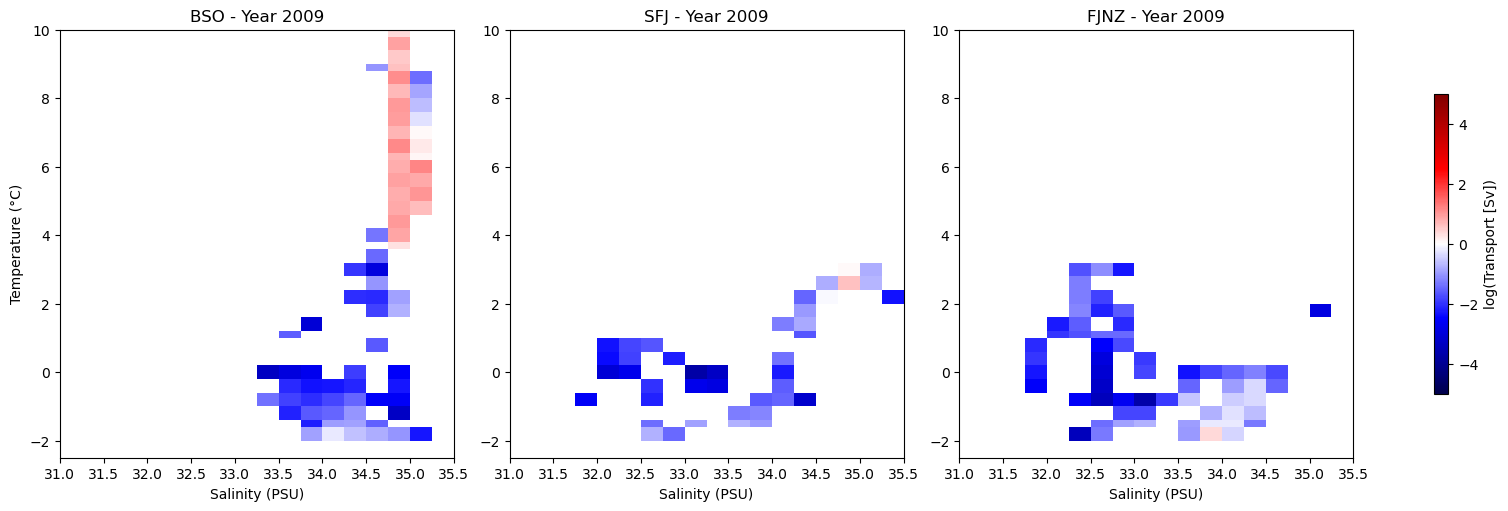

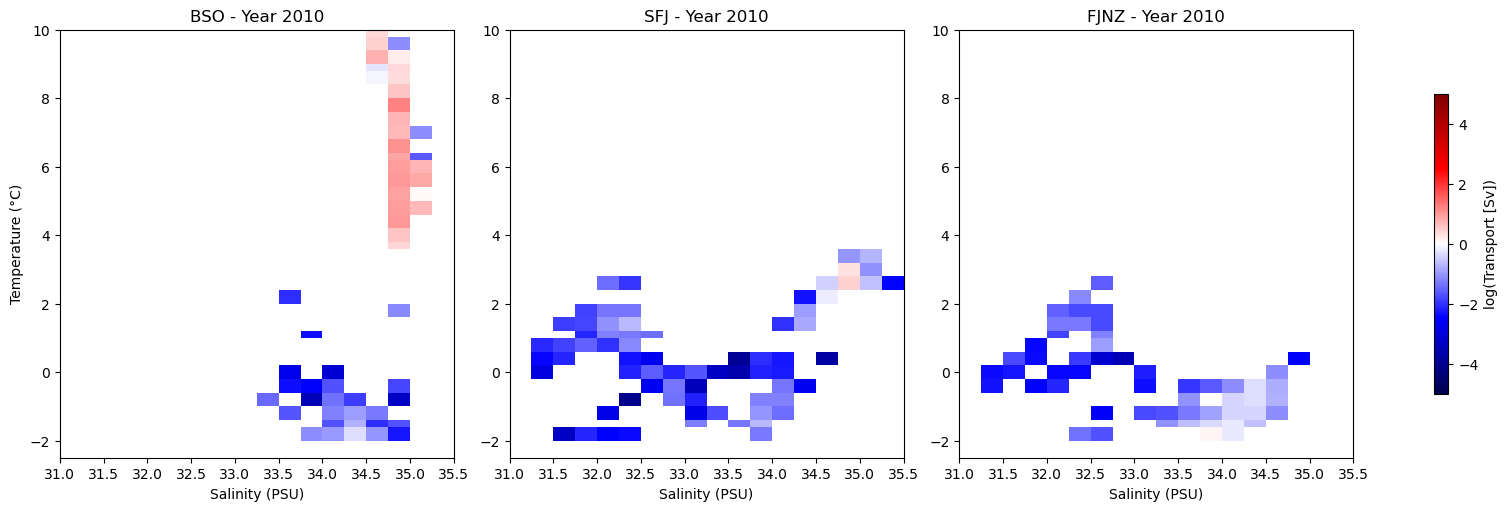

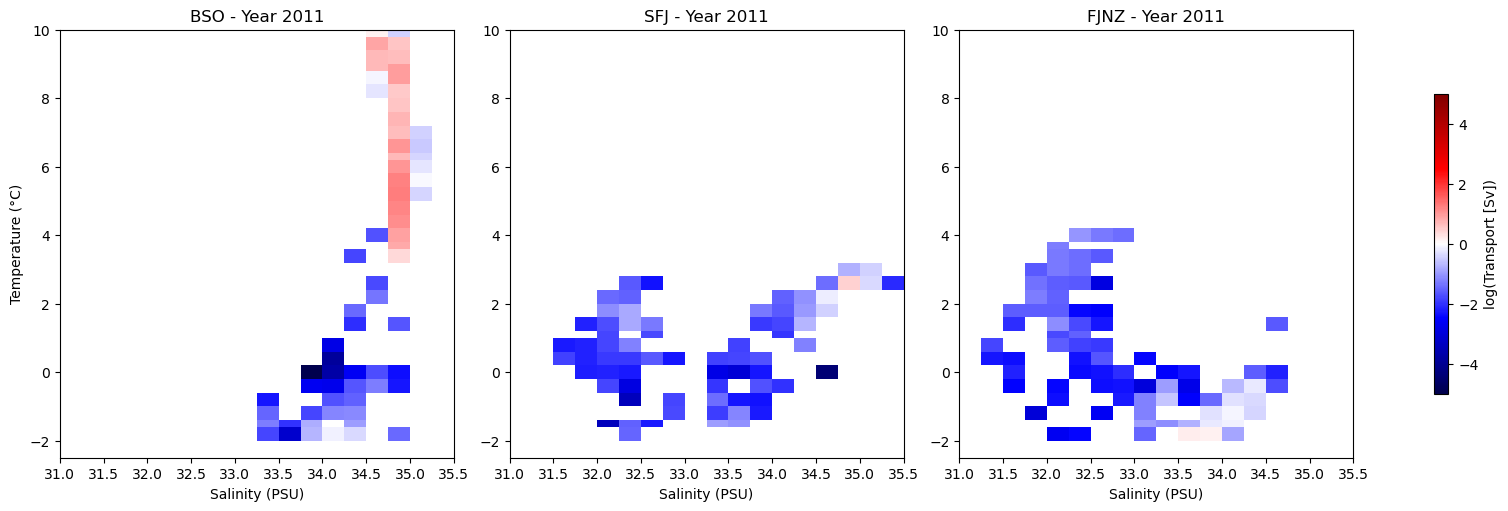

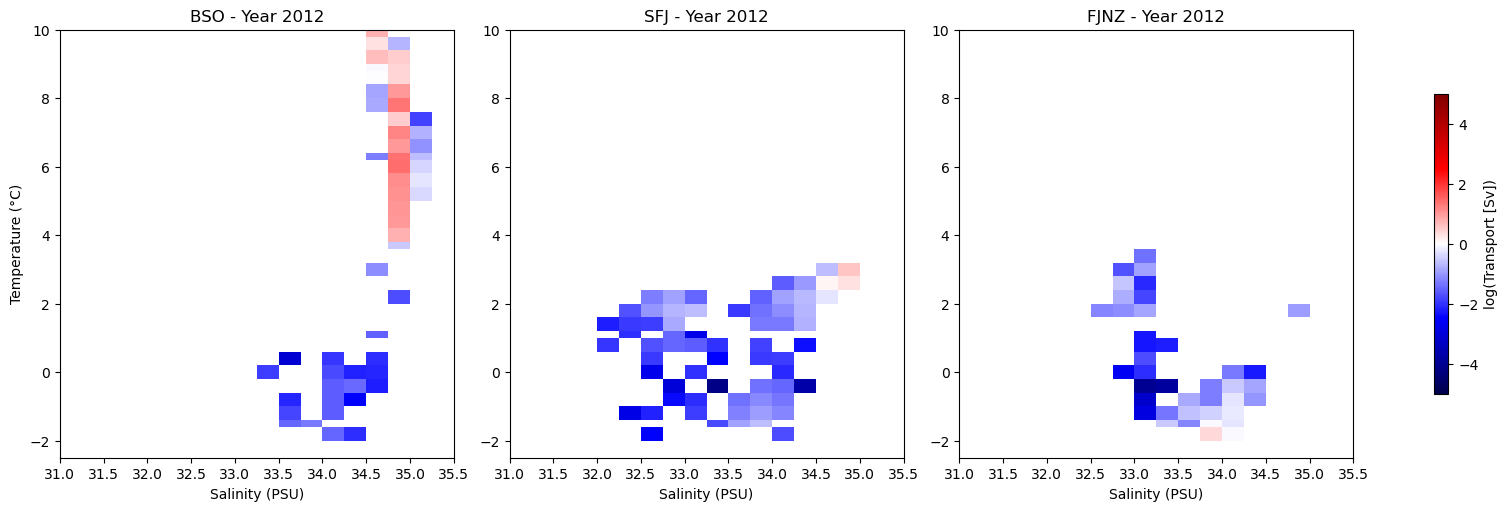

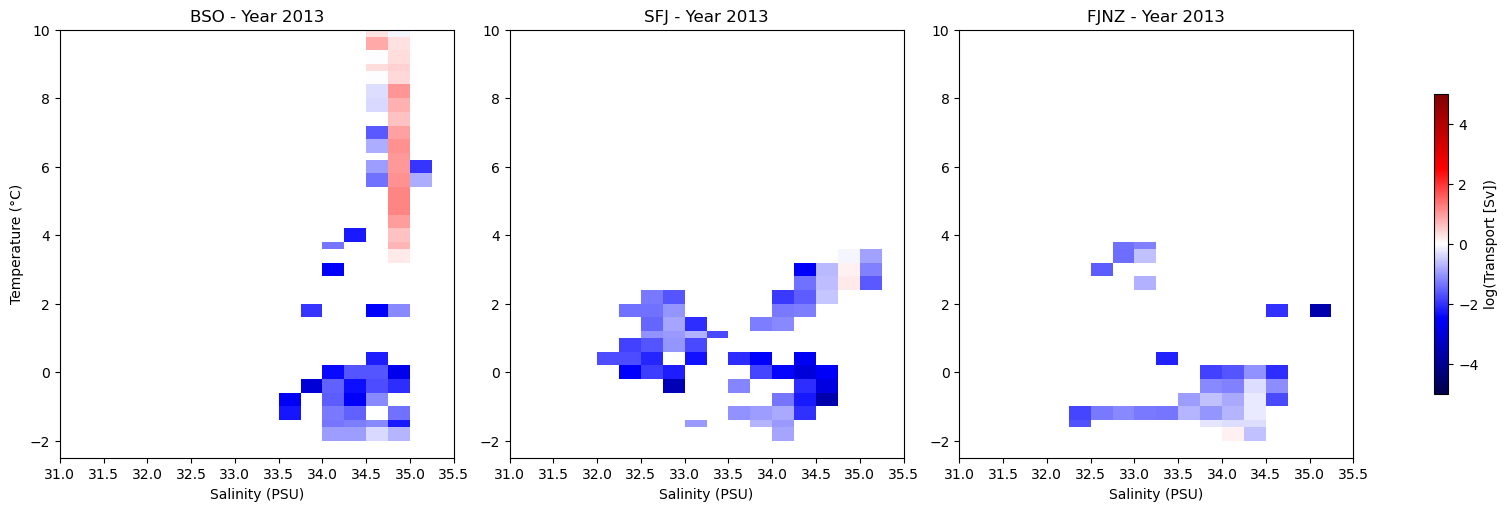

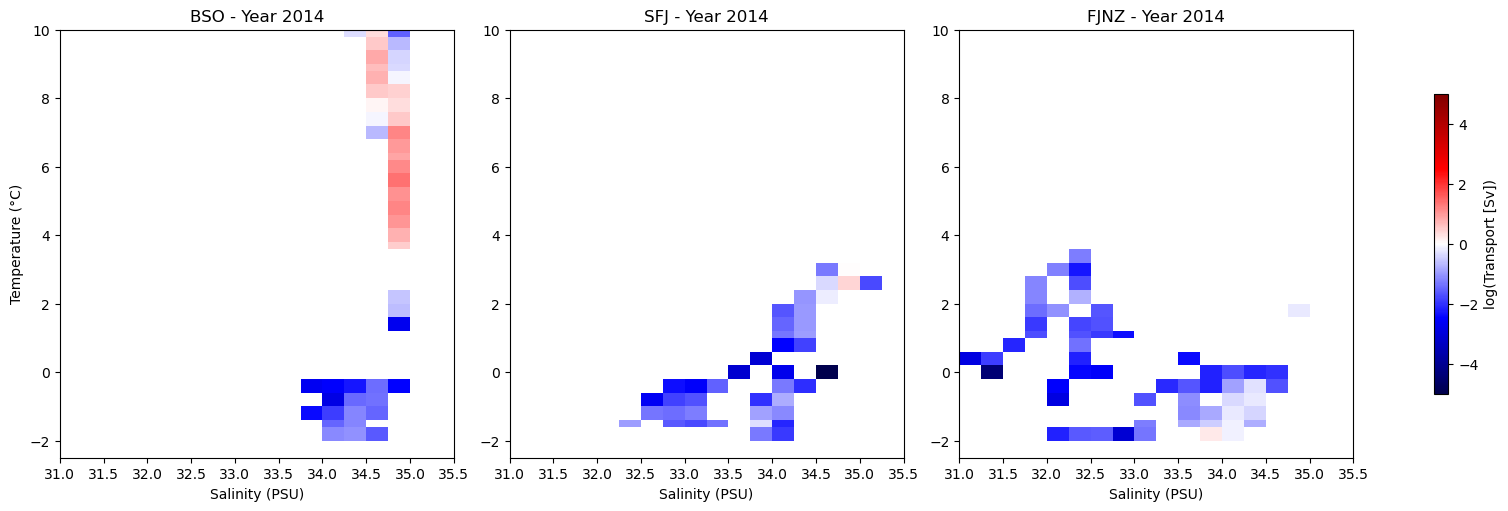

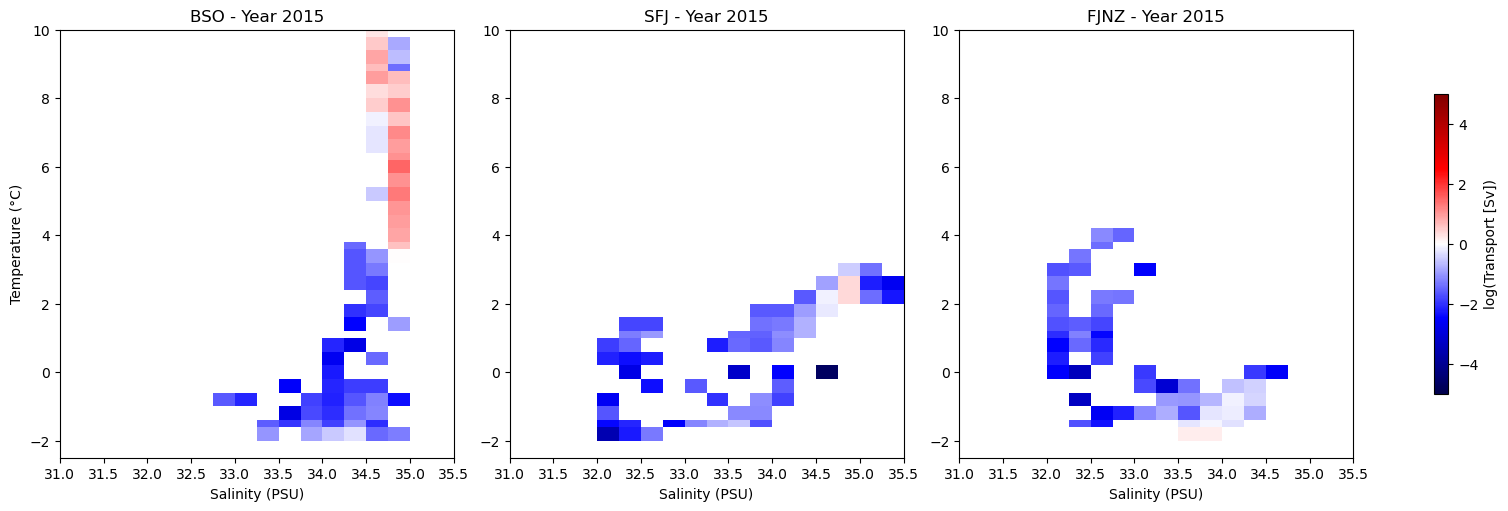

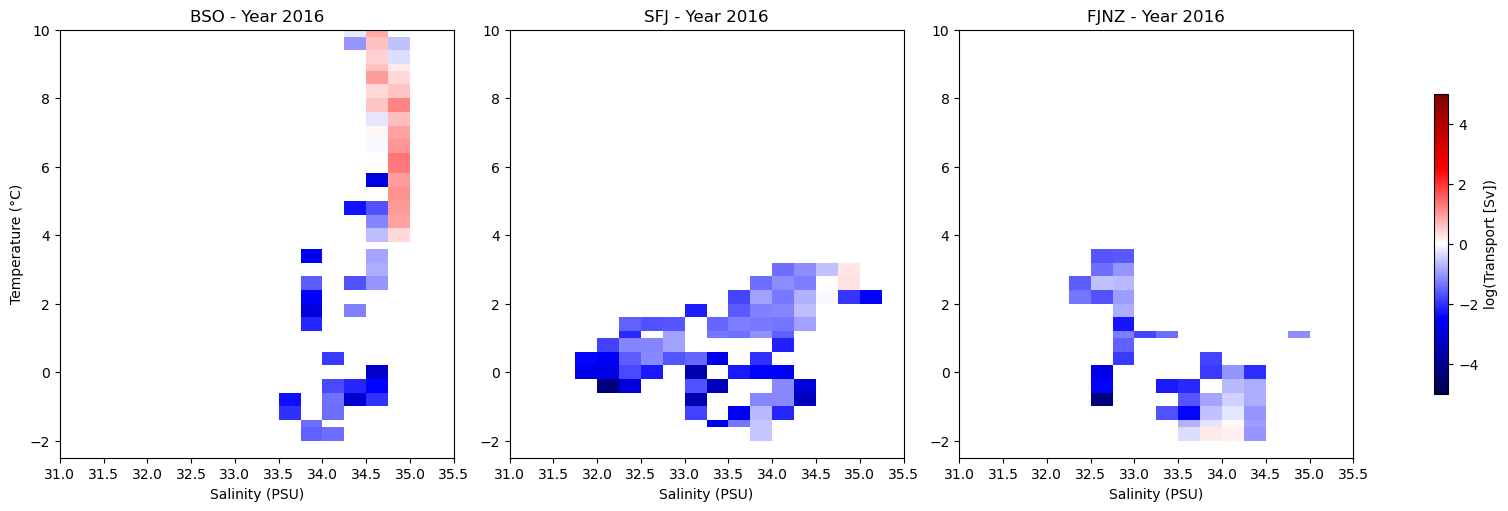

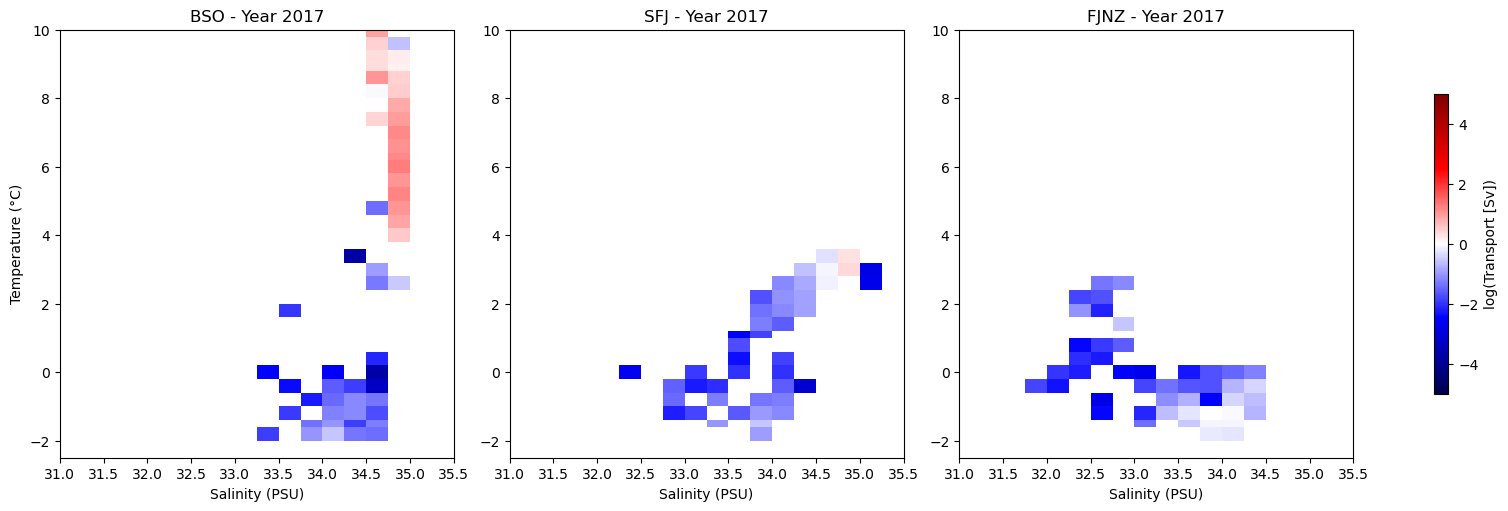

In [113]:
# Load distributions
distr_bso = np.load("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_bso.npy")
distr_sfj = np.load("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_sfj.npy")
distr_fjnz = np.load("/scratch2/mmurakami/aste_270x450x180/ASTER1/distr_fjnz.npy")


# Iterate over each year
for year in range(nyears):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    # Compute the yearly mean distribution for each gate
    avg_distr_bso = np.nanmean(distr_bso[year], axis=0)  # Shape: (nS, nT)
    avg_distr_sfj = np.nanmean(distr_sfj[year], axis=0)
    avg_distr_fjnz = np.nanmean(distr_fjnz[year], axis=0)

    # Define plot titles and data
    gates = ["BSO", "SFJ", "FJNZ"]
    data = [avg_distr_bso, avg_distr_sfj, avg_distr_fjnz]

    for i, ax in enumerate(axes):
        # Plot using pcolormesh
        pcm = ax.pcolormesh(Sbin, Tbin, np.log10(data[i] * 1e-6), cmap='seismic', vmin=-5, vmax=5)

        # Formatting
        ax.set_title(f"{gates[i]} - Year {allyears[year]}")
        ax.set_xlabel("Salinity (PSU)")
        if i == 0:
            ax.set_ylabel("Temperature (°C)")

        ax.set_ylim(-2.5, 10)
        ax.set_xlim(31, 35.5)

    # Add colorbar
    cbar = fig.colorbar(pcm, ax=axes, orientation='vertical', shrink=0.7, aspect=20)
    cbar.set_label("log(Transport [Sv])")

    # Save the figure for each year
    plt.savefig(f"figs/gate_adv/inflow_outflow_year_{year + 1}.png", dpi=300)
    plt.show()


# now try and loop back to dVdt and look for one month

In [123]:
# redefine dVdt for March 2007
# get the timesteps for the year 2007
# ocean and ice
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2007"] = np.arange(3,5,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])
dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()

tsteps = len(datetimes)-1
tsteps

# get ETAN as snapshots, get THETADR and SALTDR as snapshots

file_name = 'budg3d_snap_set2'
meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_snap_set2["fldList"])
varnames = np.array(["THETADR","SALTDR"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

THETA = np.full((len(tsstr),nz,ny,nx),np.nan)
SALT = np.full((len(tsstr),nz,ny,nx),np.nan)

for i in range(len(tsstr)):
    thisTHETADR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisTHETADR = thisTHETADR.reshape(nz,ny,nx)
    THETA[i] = thisTHETADR / DRF3d  * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))  # degC
    thisSALTDR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[1])
    thisSALTDR = thisSALTDR.reshape(nz,ny,nx)
    SALT[i] = thisSALTDR / DRF3d  * np.tile(mymsk[np.newaxis,:,:],(nz,1,1)) # PSU

# create the TS bins for the two timesteps

binned_theta_new = np.zeros((len(tsstr),nz,ny,nx))
binned_salt_new = np.zeros((len(tsstr),nz,ny,nx))

for i in range(len(tsstr)):
    binned_thetai = bin_array(THETA[i],binsTH_edges)
    binned_thetai = binned_thetai.astype(float)
    binned_thetai[binned_thetai == nT] = np.nan      # I think this line is why we have previously had the mismatch between layers and avg
    binned_salinityi = bin_array(SALT[i],binsSLT_edges)
    binned_salinityi = binned_salinityi.astype(float)
    binned_salinityi[binned_salinityi == nS] = np.nan

    # set these in the larger array
    binned_theta_new[i] = binned_thetai
    binned_salt_new[i] = binned_salinityi

# define dETAN/dt -  I don't think we want to do this yet I think we want to bin first and then calculate
file_name = 'budg2d_snap_set1'
meta_budg2d_snap_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")

# try to read this with rec
fldlist = np.array(meta_budg2d_snap_set1['fldList'])
varnames = np.array(['ETAN'])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

ETAN = np.full((len(tsstr),ny,nx),np.nan)

for i in range(len(tsstr)):
    thisETAN,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisETAN = thisETAN.reshape(ny,nx)
    ETAN[i] = thisETAN

# dETANdt =  (ETAN[1, :, :] - ETAN[0, :, :]) / dt    # m/s

# define dV/dt
dz = mk3D_mod(mygrid['DRF'],hfC) * hfC           # m (dZ)
dxdy = RAC3
volume = np.zeros((len(tsstr),nz,ny,nx))
for i in range(len(tsstr)):
    volume[i] = (dz + ETAN[i]) * dxdy * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))           # m^3

# create the volume meshes for the two timesteps and plot
idxs = np.where(mymsk == 1)
npoints = len(idxs[0])
mesh = create_TS_mesh(tsstr,nS,nT,npoints,binned_salt_new, binned_theta_new,volume,idxs,dT,dS)
dVdt = (np.nansum(mesh[1],axis=2) - np.nansum(mesh[0],axis=2)) / dt   # m^3/degC/PSU / s = m^3/s/degC/PSU

In [136]:
# grab the in-out values we want
# allyears[4]
mydistrs_sample = distr_bso[4][2] + distr_sfj[4][2] + distr_fjnz[4][2]

In [144]:
binwidthTtile = np.tile(binwidthT[np.newaxis,:],(nS,1))
binwidthStile = np.tile(binwidthT[:,np.newaxis],(1,nT))

In [145]:
def compute_gradient_manual(data_s, data_t, spacing_s, spacing_t):
    # Gradient for salinity along axis 0
    gradient_s = np.zeros_like(data_s)
    gradient_s[1:-1] = (data_s[2:] - data_s[:-2]) / (spacing_s[2:] + spacing_s[:-2])
    gradient_s[0] = (data_s[1] - data_s[0]) / spacing_s[1]  # forward difference at start
    gradient_s[-1] = (data_s[-1] - data_s[-2]) / spacing_s[-1]  # backward difference at end

    # Gradient for temperature along axis 1
    gradient_t = np.zeros_like(data_t)
    gradient_t[:, 1:-1] = (data_t[:, 2:] - data_t[:, :-2]) / (spacing_t[:, 2:] + spacing_t[:, :-2])
    gradient_t[:, 0] = (data_t[:, 1] - data_t[:, 0]) / spacing_t[:, 1]  # forward difference at start
    gradient_t[:, -1] = (data_t[:, -1] - data_t[:, -2]) / spacing_t[:, -1]  # backward difference at end

    return gradient_s, gradient_t

In [146]:
# grab the internal distribution
J_S_div, J_T_div = compute_gradient_manual(JtermsS_all[0][0], JtermsT_all[0][0], binwidthStile, binwidthTtile)
div_J = J_S_div + J_T_div
div_J[JtermsS_all[0][0] == 0] = 0

(-2.0, 9.0)

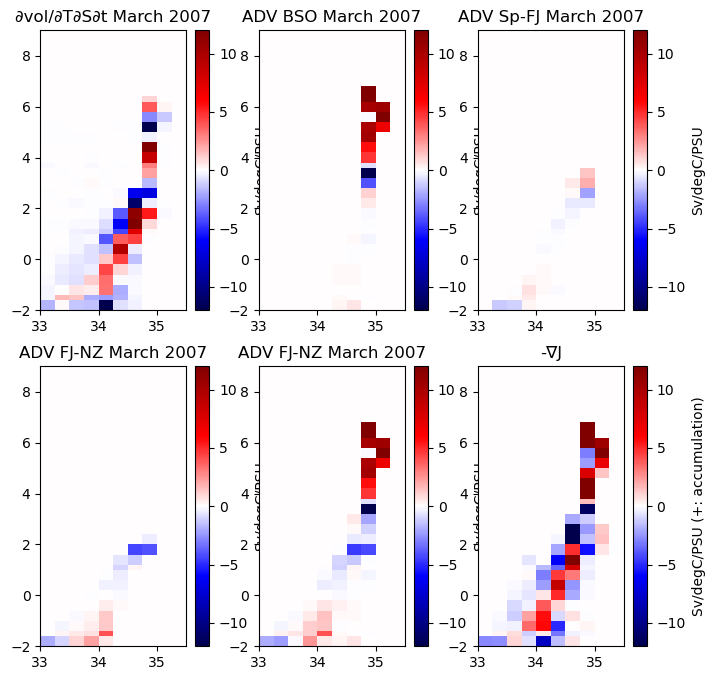

In [149]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(231)
cb = ax.pcolormesh(Sbin,Tbin,(dVdt*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("∂vol/∂T∂S∂t March 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)

ax = plt.subplot(232)
cb = ax.pcolormesh(Sbin,Tbin,(distr_bso[4][2]*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("ADV BSO March 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)

ax = plt.subplot(233)
cb = ax.pcolormesh(Sbin,Tbin,(distr_sfj[4][2]*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("ADV Sp-FJ March 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)


ax = plt.subplot(234)
cb = ax.pcolormesh(Sbin,Tbin,(distr_fjnz[4][2]*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("ADV FJ-NZ March 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)

ax = plt.subplot(235)
cb = ax.pcolormesh(Sbin,Tbin,(mydistrs_sample*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("ADV FJ-NZ March 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)

ax = plt.subplot(236)
cb = ax.pcolormesh(Sbin,Tbin,-div_J + (mydistrs_sample*1e-6) ,cmap="seismic",vmin=-12,vmax=12)
ax.set_title("-∇J")
plt.colorbar(cb,label="Sv/degC/PSU (+: accumulation)")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,9)

# let's compare 2007 to 2014 to see if this makes sense

In [153]:
y1 = 4
y2 = 11

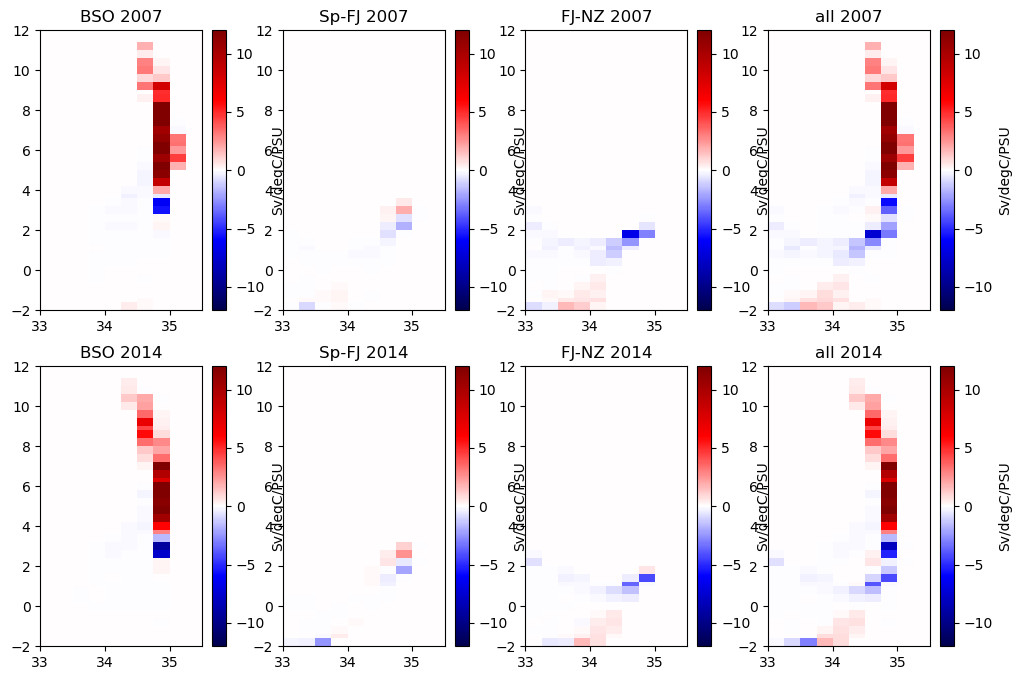

In [160]:
fig = plt.figure(figsize = (12,8))

# first row: year 1 for the gateway transports as an average
ax = plt.subplot(241)
data = np.nanmean(distr_bso[y1],axis=0) # annual average
cb = ax.pcolormesh(Sbin,Tbin,(data*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("BSO 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(242)
data1 = np.nanmean(distr_sfj[y1],axis=0)
cb = ax.pcolormesh(Sbin,Tbin,(data1*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("Sp-FJ 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(243)
data2 = np.nanmean(distr_fjnz[y1],axis=0)
cb = ax.pcolormesh(Sbin,Tbin,(data2*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("FJ-NZ 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(244)
cb = ax.pcolormesh(Sbin,Tbin,((data+data1+data2)*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("all 2007")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

# second row: year 2 for the gateway transports as an average
ax = plt.subplot(245)
data = np.nanmean(distr_bso[y2],axis=0) # annual average
cb = ax.pcolormesh(Sbin,Tbin,(data*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("BSO 2014")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(246)
data1 = np.nanmean(distr_sfj[y2],axis=0)
cb = ax.pcolormesh(Sbin,Tbin,(data1*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("Sp-FJ 2014")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(247)
data2 = np.nanmean(distr_fjnz[y2],axis=0)
cb = ax.pcolormesh(Sbin,Tbin,(data2*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("FJ-NZ 2014")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

ax = plt.subplot(248)
cb = ax.pcolormesh(Sbin,Tbin,((data+data1+data2)*1e-6),cmap="seismic",vmin=-12,vmax=12)
ax.set_title("all 2014")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,12)

plt.savefig("figs/sample_gate_transport.png",dpi=300)